In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


    ☑️                   0
0  #️⃣  keycap number sign
1   *⃣     keycap asterisk
2  0️⃣   keycap digit zero
3  1⃣️    keycap digit one
4  1️⃣    keycap digit one
(600, 768)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31105 (\N{CJK UNIFIED IDEOGRAPH-7981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

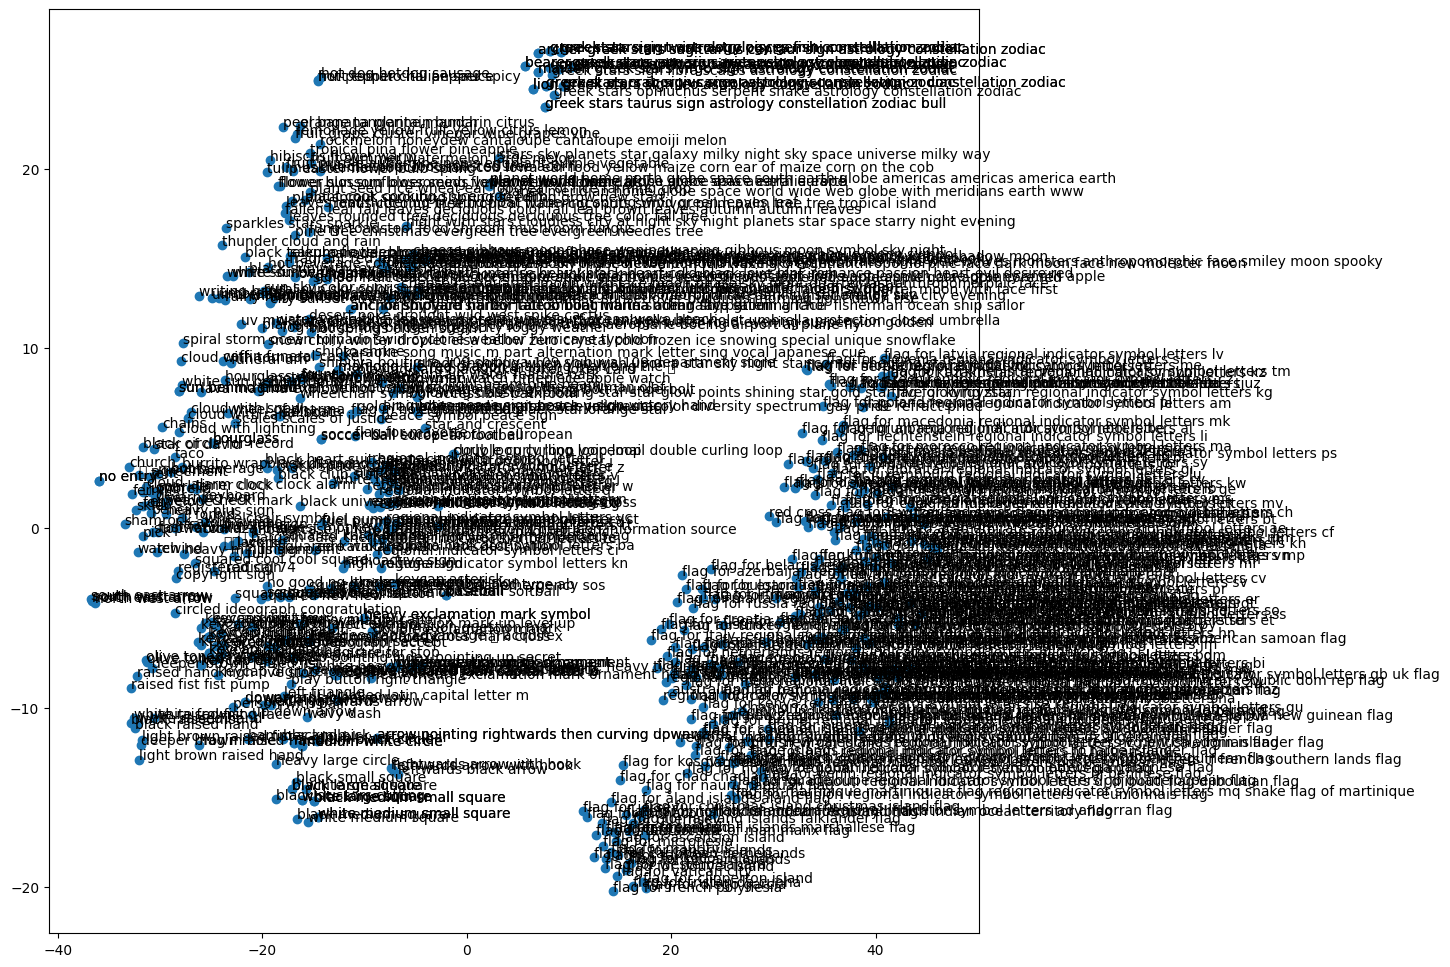

In [2]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

size = 600
debut = 0

# Instancier le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', add_special_tokens=False)
model = BertModel.from_pretrained('bert-base-uncased')

data = pd.read_csv("emoji_joined.txt", delimiter='\t')

def concat_noms(group):
    return ' '.join(group[data.columns[0]])

data = data.groupby(data.columns[1]).apply(concat_noms)
data = data.reset_index()

print(data.head())

emoji_description = data.iloc[:,1]
emoji_description = emoji_description.tolist()
emoji_description = emoji_description[debut:debut + size]


# Prétraiter le texte à encoder avec le modèle BERT
inputs = tokenizer(emoji_description, padding=True, truncation=True, return_tensors='pt')

# Obtenir les embeddings des tokens avec BERT
embeddings = model(**inputs).last_hidden_state
embeddings = embeddings[:, 0, :]

# Appliquer la méthode t-SNE
tsne = TSNE(n_components=2, random_state=42)
print(embeddings.detach().numpy().reshape(-1, 768).shape)
resultats_tsne = tsne.fit_transform(embeddings.detach().numpy().reshape(-1, 768))


# Visualiser les embeddings avec la méthode t-SNE


fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(resultats_tsne[:, 0], resultats_tsne[:, 1])

for i, txt in enumerate(emoji_description):
    ax.annotate(txt, (resultats_tsne[i, 0], resultats_tsne[i, 1]))

plt.show()

In [3]:
import plotly.graph_objects as go
from tqdm import tqdm

fig = go.Figure()

for i, txt in tqdm(enumerate(emoji_description)):
    fig.add_annotation(
        x=resultats_tsne[i, 0],
        y=resultats_tsne[i, 1],
        text=data.iloc[i,0],
        font=dict(size=15),
        showarrow=False
    )

fig.show()

600it [01:44,  5.71it/s]


In [4]:
fig.write_html('figure.html')